<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRAC2</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRAC 2: Limpieza y Análisis de Datos


<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong> Francisco Jesús Cárdenas Ruiz y Jesús Manuel Montero Garrido.
</div>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Carga del conjunto de datos

In [2]:
# Carga de los datos desde pandas:
data = pd.read_csv('VCDE_003.csv', sep='|', encoding="latin-1")
# Mostramos la tabla:
data.head(10)

,Unnamed: 0,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha
0,0,2021-01-01,0252D,ARENYS DE MAR,BARCELONA,74,7.6,0.0,4.6,10.6,NE,0.8,6.9
1,1,2021-01-02,0252D,ARENYS DE MAR,BARCELONA,74,7.3,0.0,3.5,11.1,NE,1.1,4.7
2,2,2021-01-03,0252D,ARENYS DE MAR,BARCELONA,74,6.3,0.0,2.0,10.6,NNE,1.9,5.0
3,3,2021-01-04,0252D,ARENYS DE MAR,BARCELONA,74,6.4,0.0,1.5,11.2,NNE,1.1,7.2
4,4,2021-01-05,0252D,ARENYS DE MAR,BARCELONA,74,6.6,0.3,1.7,11.4,NNE,1.4,5.0
5,5,2021-01-06,0252D,ARENYS DE MAR,BARCELONA,74,6.4,4.2,1.3,11.4,NNW,1.7,5.3
6,6,2021-01-07,0252D,ARENYS DE MAR,BARCELONA,74,5.8,0.0,3.2,8.3,E,0.6,3.9
7,7,2021-01-08,0252D,ARENYS DE MAR,BARCELONA,74,5.2,0.5,1.3,9.0,NE,1.4,12.2
8,8,2021-01-09,0252D,ARENYS DE MAR,BARCELONA,74,4.4,4.1,2.8,6.1,NNW,4.2,16.7
9,9,2021-01-10,0252D,ARENYS DE MAR,BARCELONA,74,7.0,0.0,4.8,9.1,NE,3.6,19.4


In [3]:
# Observamos los tipos de campos.
data.dtypes

Unnamed: 0      int64
fecha          object
indicativo     object
nombre         object
provincia      object
altitud         int64
tmed          float64
prec          float64
tmin          float64
tmax          float64
dir            object
velmedia      float64
racha         float64
dtype: object

In [4]:
# Verificamos la existencia de missing values:
data.isnull().sum()

Unnamed: 0         0
fecha              0
indicativo         0
nombre             0
provincia          0
altitud            0
tmed               0
prec          103344
tmin          137564
tmax          137969
dir           481795
velmedia      302349
racha         481960
dtype: int64

In [5]:
# Creamos un df de las variables numéricas:
df_num = data[["altitud", "tmed", "prec", "tmin", "tmax", "velmedia", "racha"]]

In [6]:
# Imputamos las variables qeu contienen nullos con su media.
df_num['prec'].fillna(df_num['prec'].mean(), inplace=True)
df_num['tmin'].fillna(df_num['tmin'].mean(), inplace=True)
df_num['tmax'].fillna(df_num['tmax'].mean(), inplace=True)
df_num['velmedia'].fillna(df_num['velmedia'].mean(), inplace=True)
df_num['racha'].fillna(df_num['racha'].mean(), inplace=True)

In [7]:
df_num.isnull().sum()

altitud     0
tmed        0
prec        0
tmin        0
tmax        0
velmedia    0
racha       0
dtype: int64

## 2. Análisis de los datos

In [8]:
# Calculamos la mediana:
print("Mediana de cada variable:")
print(df_num.median())

# Calculamos los estadísticos descriptivos básicos:
df_num.describe().loc[["mean", "std", "min", "max"],:]

Mediana de cada variable:
altitud     336.000000
tmed         15.000000
prec          0.000000
tmin          9.985878
tmax         20.329162
velmedia      2.800000
racha        10.057830
dtype: float64


,altitud,tmed,prec,tmin,tmax,velmedia,racha
mean,432.306904,14.981963,1.613503,9.985878,20.329162,3.115722,10.057830
std,437.044750,7.006868,5.605936,6.656646,7.651751,2.143480,3.991677
min,1.000000,-16.800000,0.000000,-25.200000,-11.600000,0.000000,0.000000
max,2371.000000,37.400000,337.000000,33.200000,47.000000,43.300000,68.900000


In [9]:
data[["altitud", "tmed", "prec", "tmin", "tmax", "velmedia", "racha"]] = df_num[["altitud", "tmed", "prec", "tmin", "tmax", "velmedia", "racha"]]
data = data.drop(columns=["Unnamed: 0"])
data.head(10)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha
0,2021-01-01,0252D,ARENYS DE MAR,BARCELONA,74,7.6,0.0,4.6,10.6,NE,0.8,6.9
1,2021-01-02,0252D,ARENYS DE MAR,BARCELONA,74,7.3,0.0,3.5,11.1,NE,1.1,4.7
2,2021-01-03,0252D,ARENYS DE MAR,BARCELONA,74,6.3,0.0,2.0,10.6,NNE,1.9,5.0
3,2021-01-04,0252D,ARENYS DE MAR,BARCELONA,74,6.4,0.0,1.5,11.2,NNE,1.1,7.2
4,2021-01-05,0252D,ARENYS DE MAR,BARCELONA,74,6.6,0.3,1.7,11.4,NNE,1.4,5.0
5,2021-01-06,0252D,ARENYS DE MAR,BARCELONA,74,6.4,4.2,1.3,11.4,NNW,1.7,5.3
6,2021-01-07,0252D,ARENYS DE MAR,BARCELONA,74,5.8,0.0,3.2,8.3,E,0.6,3.9
7,2021-01-08,0252D,ARENYS DE MAR,BARCELONA,74,5.2,0.5,1.3,9.0,NE,1.4,12.2
8,2021-01-09,0252D,ARENYS DE MAR,BARCELONA,74,4.4,4.1,2.8,6.1,NNW,4.2,16.7
9,2021-01-10,0252D,ARENYS DE MAR,BARCELONA,74,7.0,0.0,4.8,9.1,NE,3.6,19.4


In [10]:
# Verificamos la existencia de missing values:
data.isnull().sum()

fecha              0
indicativo         0
nombre             0
provincia          0
altitud            0
tmed               0
prec               0
tmin               0
tmax               0
dir           481795
velmedia           0
racha              0
dtype: int64

## 3. Análisis exploratorio de los datos

In [11]:
# Creamos una función para obtener el histograma.
def crea_histograma(data, variable, nomb_var):
    """ Crea el histograma para el dataset
        y la variable escogida.
    Ars:
        data -- Conjunto de datos.
        variable -- Campo a visualizar.
        nomb_var -- Nombre de la variable.
    Returns:
        Histograma de la variable objetivo.
    """
    # Fijamos el tamaño del gráfico.
    plt.figure(figsize=(10, 5))
    # Creamos el histograma para la variable objetivo.
    plt.hist(data[variable], bins=100)
    # Definimos las características del gráfico.
    plt.xlabel(nomb_var)
    plt.ylabel("Frecuencia")
    plt.title("Histograma de " + nomb_var)
    plt.show()

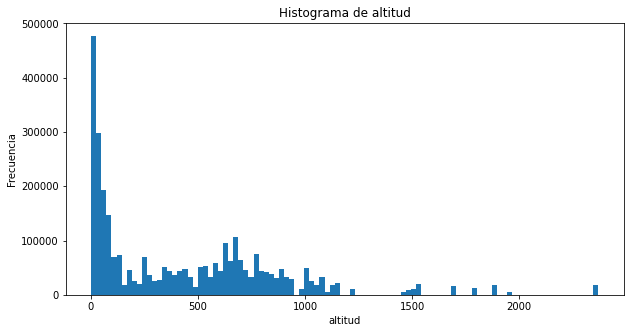

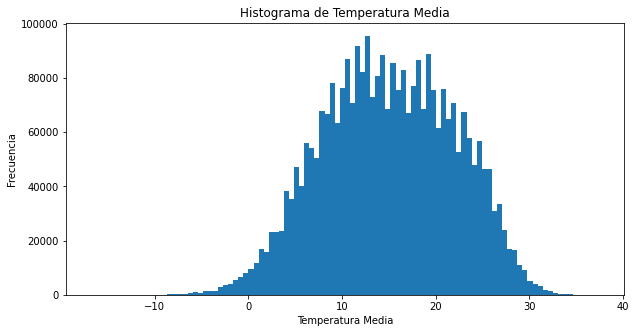

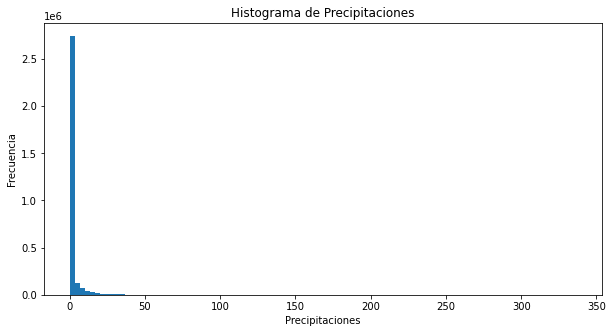

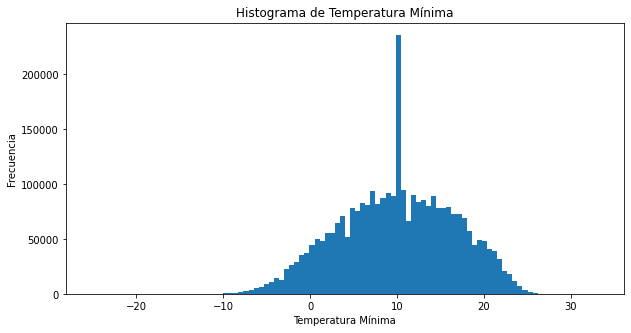

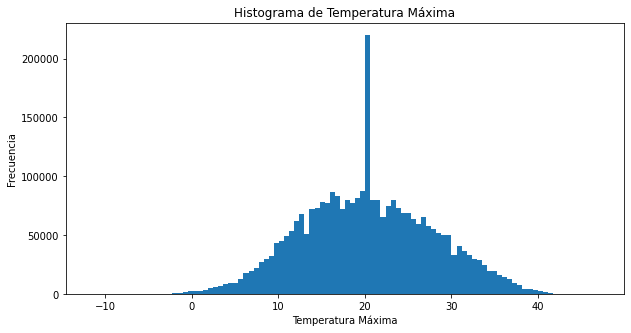

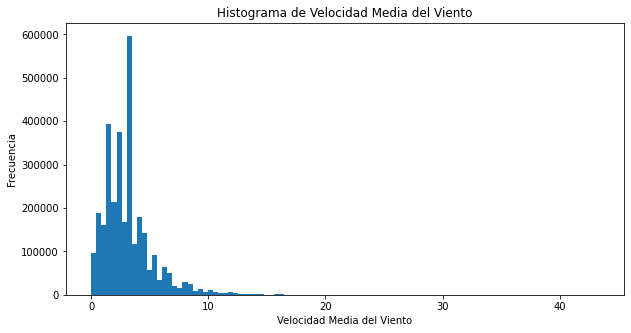

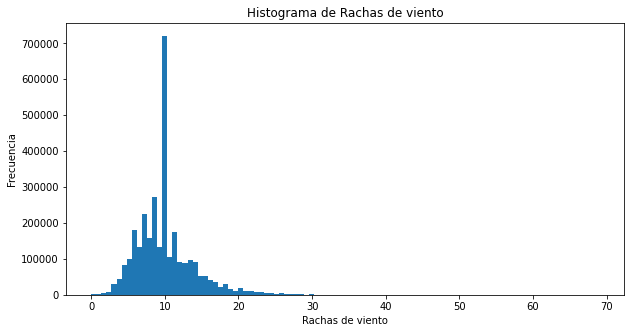

In [12]:
# Ejecutamos la función para las variables categóricas.
crea_histograma(df_num, ['altitud'], "altitud")
crea_histograma(df_num, ['tmed'], "Temperatura Media")
crea_histograma(df_num, ['prec'], "Precipitaciones")
crea_histograma(df_num, ['tmin'], "Temperatura Mínima")
crea_histograma(df_num, ['tmax'], "Temperatura Máxima")
crea_histograma(df_num, ['velmedia'], "Velocidad Media del Viento")
crea_histograma(df_num, ['racha'], "Rachas de viento")

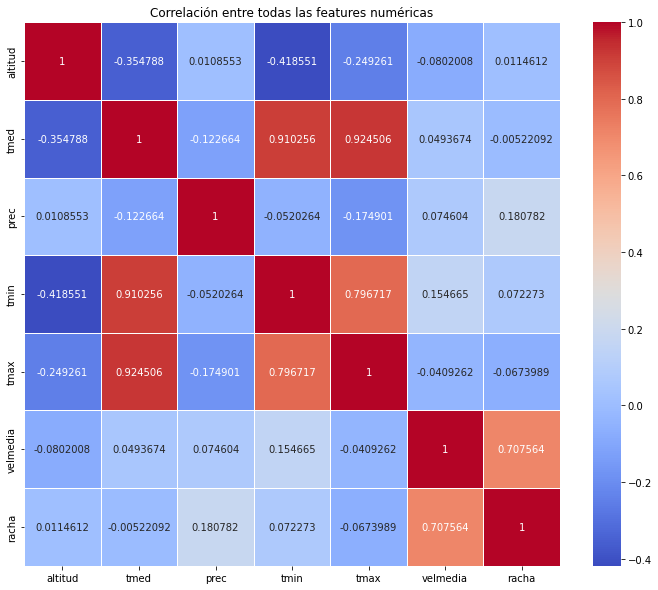

In [13]:
# Creamos un mapa de calor en base a la correlacción de las variables numéricas.
plt.figure(figsize=(12,10))
sns.heatmap(df_num.astype(float).corr(), linewidth=0.5, cmap = "coolwarm", annot=True, fmt='g')
plt.title('Correlación entre todas las features numéricas')
plt.show()

In [14]:
serie_grazalema = data[data["nombre"] == "GRAZALEMA"]
serie_t = serie_grazalema[["fecha", "tmed"]]
serie_t = serie_t.loc[serie_t["fecha"].between('2021-01-01', '2021-12-31')]

serie_t.head(10)

,fecha,tmed
60733,2021-01-01,4.6
60734,2021-01-02,3.4
60735,2021-01-03,2.3
60736,2021-01-04,3.2
60737,2021-01-05,4.7
60738,2021-01-06,3.9
60739,2021-01-07,5.2
60740,2021-01-08,7.0
60741,2021-01-09,2.0
60742,2021-01-10,0.9


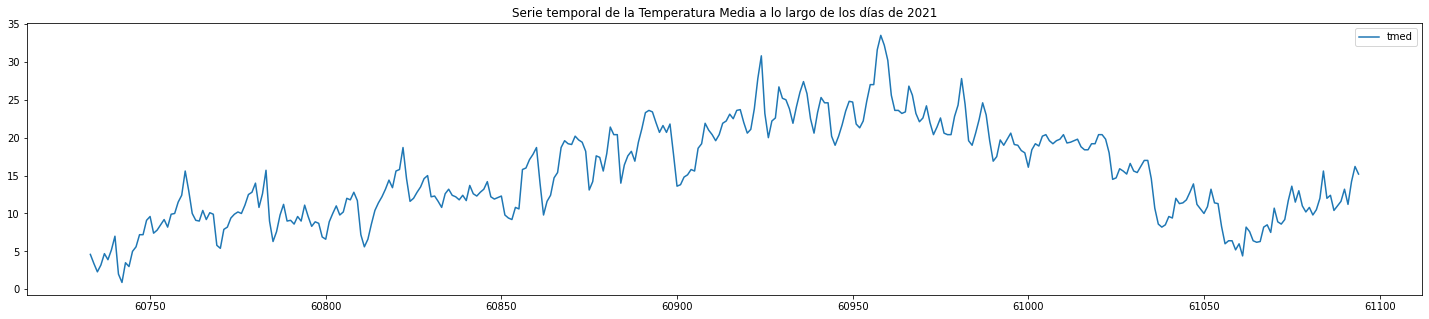

In [15]:
serie_t.plot(figsize=(25, 5))
plt.title('Serie temporal de la Temperatura Media a lo largo de los días de 2021')
plt.show()